In [16]:
import os
from datetime import datetime, timedelta
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [18]:
# -----------------------
# Chemin vers le fichier texte
# -----------------------
chemin_txt = r"C:\Users\amine\Desktop\test\files_list.txt"

# Dictionnaire pour stocker les fichiers par date : année > mois > jour
fichiers_par_date = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

# Lecture du fichier ligne par ligne
with open(chemin_txt, "r", encoding="utf-8") as f:
    for ligne in f:
        chemin_fichier = ligne.strip()  # Supprime les retours à la ligne, espaces

        # Vérifie que c’est bien un fichier .wav
        if not chemin_fichier.lower().endswith(".flac"):
            continue

        try:
            # Récupère juste le nom du fichier (fonctionne même sur Windows ou Linux)
            nom_fichier = os.path.basename(chemin_fichier)

            # Exemple : S4A09154_20190218_174500.wav → on prend "20190218"
            date_str = nom_fichier.split("_")[1]  # Extrait "20190218"
            date_obj = datetime.strptime(date_str, "%Y%m%d")

            annee = date_obj.year
            mois = date_obj.month
            jour = date_obj.day

            # Ajoute le fichier au bon endroit dans le dictionnaire
            fichiers_par_date[annee][mois][jour].append(chemin_fichier)

        except Exception as e:
            print(f"Erreur avec la ligne : {ligne.strip()} → {e}")

# -----------------------
# Exemple d'utilisation
# -----------------------

# Tous les fichiers du 18 février 2019
fichiers_du_18_fev = fichiers_par_date[2019][3][19]

print(f"\n Fichiers du 18 février 2019 : ({len(fichiers_du_18_fev)} fichiers)")
for f in fichiers_du_18_fev:
    print(f)



 Fichiers du 18 février 2019 : (96 fichiers)
data/datasets/nouragues_19-23/2019/Data/S4A09154_20190319_000000.flac
data/datasets/nouragues_19-23/2019/Data/S4A09154_20190319_001500.flac
data/datasets/nouragues_19-23/2019/Data/S4A09154_20190319_003000.flac
data/datasets/nouragues_19-23/2019/Data/S4A09154_20190319_004500.flac
data/datasets/nouragues_19-23/2019/Data/S4A09154_20190319_010000.flac
data/datasets/nouragues_19-23/2019/Data/S4A09154_20190319_011500.flac
data/datasets/nouragues_19-23/2019/Data/S4A09154_20190319_013000.flac
data/datasets/nouragues_19-23/2019/Data/S4A09154_20190319_014500.flac
data/datasets/nouragues_19-23/2019/Data/S4A09154_20190319_020000.flac
data/datasets/nouragues_19-23/2019/Data/S4A09154_20190319_021500.flac
data/datasets/nouragues_19-23/2019/Data/S4A09154_20190319_023000.flac
data/datasets/nouragues_19-23/2019/Data/S4A09154_20190319_024500.flac
data/datasets/nouragues_19-23/2019/Data/S4A09154_20190319_030000.flac
data/datasets/nouragues_19-23/2019/Data/S4A0

In [19]:
# -----------------------
# Tous les fichiers de février 2019
# -----------------------

annee = 2019
mois = 2

print(f"\n Fichiers du mois de février {annee} :")

fichiers_fevrier = []

# On vérifie que l'année et le mois existent dans le dictionnaire
if annee in fichiers_par_date and mois in fichiers_par_date[annee]:
    for jour in fichiers_par_date[annee][mois]:
        fichiers_fevrier.extend(fichiers_par_date[annee][mois][jour])

    print(f"Nombre total de fichiers : {len(fichiers_fevrier)}\n")
    for fichier in fichiers_fevrier:
        print(fichier)
else:
    print("Aucun fichier trouvé pour ce mois.")



 Fichiers du mois de février 2019 :
Nombre total de fichiers : 990

data/datasets/nouragues_19-23/2019/Data/S4A09154_20190218_163000.flac
data/datasets/nouragues_19-23/2019/Data/S4A09154_20190218_164500.flac
data/datasets/nouragues_19-23/2019/Data/S4A09154_20190218_170000.flac
data/datasets/nouragues_19-23/2019/Data/S4A09154_20190218_171500.flac
data/datasets/nouragues_19-23/2019/Data/S4A09154_20190218_173000.flac
data/datasets/nouragues_19-23/2019/Data/S4A09154_20190218_174500.flac
data/datasets/nouragues_19-23/2019/Data/S4A09154_20190218_180000.flac
data/datasets/nouragues_19-23/2019/Data/S4A09154_20190218_181500.flac
data/datasets/nouragues_19-23/2019/Data/S4A09154_20190218_183000.flac
data/datasets/nouragues_19-23/2019/Data/S4A09154_20190218_184500.flac
data/datasets/nouragues_19-23/2019/Data/S4A09154_20190218_190000.flac
data/datasets/nouragues_19-23/2019/Data/S4A09154_20190218_191500.flac
data/datasets/nouragues_19-23/2019/Data/S4A09154_20190218_193000.flac
data/datasets/nouragu

In [20]:

base_path = r"C:\Users\amine\Desktop\test"

# Chargement des fichiers CSV météo
ground_lux_df = pd.read_csv(os.path.join(base_path, "monitor_ground_lux_2019.csv"))
canopy_lux_df = pd.read_csv(os.path.join(base_path, "monitor_canopy_lux_2019.csv"))
ground_rh_df = pd.read_csv(os.path.join(base_path, "monitor_ground_rh_2019.csv"))
canopy_rh_df = pd.read_csv(os.path.join(base_path, "monitor_canopy_rh_2019.csv"))

#  Fonction d'arrondi vers le quart d'heure le plus proche
def arrondir_vers_quart_heure_le_plus_proche(dt):
    minute = (dt.minute // 15) * 15
    dt_bas = dt.replace(minute=minute, second=0, microsecond=0)
    dt_haut = dt_bas + timedelta(minutes=15)
    return dt_bas if abs((dt - dt_bas).total_seconds()) <= abs((dt - dt_haut).total_seconds()) else dt_haut

# Fonction pour traiter les DataFrames météo
def process_meteo_df_v2(df, rename_dict):
    df = df.copy()
    df.columns = df.iloc[0].astype(str).str.strip()
    df = df[1:]
    df.columns = df.columns.str.strip()
    df.rename(columns=rename_dict, inplace=True)
    df["datetime"] = pd.to_datetime(df["datetime"])
    df["rounded_datetime"] = df["datetime"].apply(arrondir_vers_quart_heure_le_plus_proche)
    df = df.drop(columns=["datetime"])
    return df

# Traitement de chaque fichier météo
ground_lux_clean = process_meteo_df_v2(
    ground_lux_df,
    rename_dict={
        "Date Heure GMT -0300": "datetime",
        "Temp. °C": "ground_temp",
        "Intensité, lux": "ground_lux"
    }
)

canopy_lux_clean = process_meteo_df_v2(
    canopy_lux_df,
    rename_dict={
        "Date Heure GMT -0300": "datetime",
        "Temp. °C": "canopy_temp",
        "Intensité lux": "canopy_lux"
    }
)

ground_rh_clean = process_meteo_df_v2(
    ground_rh_df,
    rename_dict={
        "Date Heure GMT -0300": "datetime",
        "Temp °C": "ground_temp",
        "HR %": "ground_rh",
        "PtRosée °C": "ground_ptrose"
    }
)

canopy_rh_clean = process_meteo_df_v2(
    canopy_rh_df,
    rename_dict={
        "Date Heure GMT -0300": "datetime",
        "Temp °C": "canopy_temp",
        "HR %": "canopy_rh",
        "PtRosée °C": "canopy_ptrose"
    }
)

# Vérification de l'arrondi sur quelques lignes
ground_lux_clean[["ground_temp", "ground_lux", "rounded_datetime"]].head(10)


0  ground_temp ground_lux    rounded_datetime
1        28.36     180.98 2019-02-17 13:15:00
2        26.86     286.75 2019-02-17 13:30:00
3        26.25     275.89 2019-02-17 13:45:00
4        26.59     585.67 2019-02-17 14:00:00
5        26.42     271.37 2019-02-17 14:15:00
6        26.21     130.30 2019-02-17 14:30:00
7        26.17     210.57 2019-02-17 14:45:00
8        26.34     177.11 2019-02-17 15:00:00
9        26.42     189.16 2019-02-17 15:15:00
10       26.04     112.33 2019-02-17 15:30:00

In [21]:
#  Dictionnaire final regroupant toutes les données météo arrondies
meteo_par_datetime = defaultdict(dict)

#  Fonction pour insérer les mesures dans le dictionnaire final
def add_to_meteo_dict(df):
    for _, row in df.iterrows():
        dt = row["rounded_datetime"]
        for col in row.index:
            if col != "rounded_datetime":
                meteo_par_datetime[dt][col] = row[col]

#  Fusion de toutes les sources météo
add_to_meteo_dict(ground_lux_clean)
add_to_meteo_dict(canopy_lux_clean)
add_to_meteo_dict(ground_rh_clean)
add_to_meteo_dict(canopy_rh_clean)

#  Aperçu des 5 premières entrées
for dt in list(meteo_par_datetime.keys())[:5]:
    print(f"{dt} → {meteo_par_datetime[dt]}")


2019-02-17 13:15:00 → {'ground_temp': '28.36', 'ground_lux': '180.98', 'canopy_temp': '29.21', 'canopy_lux': '2540.80', 'canopy_rh': '67.69', 'canopy_ptrose': '22.65'}
2019-02-17 13:30:00 → {'ground_temp': '26.86', 'ground_lux': '286.75', 'canopy_temp': '28.13', 'canopy_lux': '1292.48', 'canopy_rh': '71.33', 'canopy_ptrose': '22.48'}
2019-02-17 13:45:00 → {'ground_temp': '26.25', 'ground_lux': '275.89', 'canopy_temp': '28.31', 'canopy_lux': '9948.16', 'canopy_rh': '71.58', 'canopy_ptrose': '22.71'}
2019-02-17 14:00:00 → {'ground_temp': '26.59', 'ground_lux': '585.67', 'canopy_temp': '29.52', 'canopy_lux': '10516.48', 'canopy_rh': '65.72', 'canopy_ptrose': '22.46'}
2019-02-17 14:15:00 → {'ground_temp': '28.47', 'ground_lux': '271.37', 'canopy_temp': '30.15', 'canopy_lux': '2356.48', 'ground_rh': '73.73', 'ground_ptrose': '23.35', 'canopy_rh': '62.44', 'canopy_ptrose': '22.20'}


In [22]:
meteo_par_datetime[datetime(2019, 3, 1)]

{'ground_temp': '21.87',
 'ground_lux': '0.00',
 'canopy_temp': '21.51',
 'canopy_lux': '0.00',
 'ground_rh': '95.06',
 'ground_ptrose': '21.07',
 'canopy_rh': '92.24',
 'canopy_ptrose': '20.23'}

In [94]:
import os
from datetime import datetime
from collections import defaultdict
import torch

# Chemins
base_path = r"C:\Users\amine\Desktop\test"
fichier_wav_txt = os.path.join(base_path, "files_list.txt")
token_dir = r"C:\Users\amine\Desktop\test\bad_tokens_test"

# Dictionnaire structuré par date
fichiers_par_date = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

# Lire les fichiers audio
with open(fichier_wav_txt, "r", encoding="utf-8") as f:
    wav_paths = [line.strip() for line in f if line.strip().endswith(".flac")]

# Traitement de chaque fichier
for path in wav_paths:
    try:
        filename = os.path.basename(path)
        parts = filename.split("_")
        date_str = parts[1]          # '20190217'
        time_str = parts[2].replace(".flac", "")  # '131500'

        dt = datetime.strptime(date_str + time_str, "%Y%m%d%H%M%S")
        rounded_dt = arrondir_vers_quart_heure_le_plus_proche(dt)

        annee = dt.year
        mois = dt.month
        jour = dt.day

        nom_sans_ext = os.path.splitext(filename)[0]
        token_path = os.path.join(token_dir, nom_sans_ext + ".pt")

        # Vérifie si le token existe et charge avec torch
        if os.path.exists(token_path):
            try:
                tokens = torch.load(token_path)
            except Exception as e:
                print(f" Erreur de chargement pour {token_path} : {e}")
                tokens = None
        else:
            tokens = None

        if os.path.exists(token_path):
            try:
                tokens = torch.load(token_path)
                diversite = len(set(tokens.view(-1).tolist()))
            except Exception as e:
                print(f"⚠️ Erreur de chargement pour {token_path} : {e}")
                tokens = None
                diversite = None
        else:
            tokens = None
            diversite = None

        # 📥 Ajout dans le dictionnaire
        fichiers_par_date[annee][mois][jour].append({
            "fichier": nom_sans_ext,
            "heure": dt.time(),
            "datetime_arrondi": rounded_dt,
            "meteo": meteo_par_datetime.get(rounded_dt, {}),
            "token": tokens,
            "diversite_token": diversite  
        })

    except Exception as e:
        print(f" Erreur avec le fichier : {path} → {e}")

# Exemple : afficher les fichiers d’un jour précis
for fiche in fichiers_par_date[2019][3][18]:
    print(fiche)


{'fichier': 'S4A09154_20190318_000000', 'heure': datetime.time(0, 0), 'datetime_arrondi': datetime.datetime(2019, 3, 18, 0, 0), 'meteo': {'ground_temp': '22.52', 'ground_lux': '0.00', 'canopy_temp': '22.27', 'canopy_lux': '0.00', 'ground_rh': '97.28', 'ground_ptrose': '22.1', 'canopy_rh': '92.45', 'canopy_ptrose': '21.02'}, 'token': None, 'diversite_token': None}
{'fichier': 'S4A09154_20190318_001500', 'heure': datetime.time(0, 15), 'datetime_arrondi': datetime.datetime(2019, 3, 18, 0, 15), 'meteo': {'ground_temp': '22.41', 'ground_lux': '0.00', 'canopy_temp': '22.07', 'canopy_lux': '0.00', 'ground_rh': '97.32', 'ground_ptrose': '22', 'canopy_rh': '93.02', 'canopy_ptrose': '20.92'}, 'token': None, 'diversite_token': None}
{'fichier': 'S4A09154_20190318_003000', 'heure': datetime.time(0, 30), 'datetime_arrondi': datetime.datetime(2019, 3, 18, 0, 30), 'meteo': {'ground_temp': '22.34', 'ground_lux': '0.00', 'canopy_temp': '21.93', 'canopy_lux': '0.00', 'ground_rh': '97.73', 'ground_ptrose

In [62]:
def afficher_infos_mois(annee, mois):
    """
    Affiche les fichiers audio + météo + token (si dispo) pour chaque jour d’un mois.
    """
    if annee not in fichiers_par_date or mois not in fichiers_par_date[annee]: 
        print(f"Aucun fichier trouvé pour {annee}-{mois:02d}")
        return

    print(f" Fichiers, météo et tokens pour le mois : {annee}-{mois:02d}\n")

    for jour in sorted(fichiers_par_date[annee][mois]):
        print(f" Jour : {annee}-{mois:02d}-{jour:02d}")
        fichiers = fichiers_par_date[annee][mois][jour]
        for fichier in fichiers:
            print(f" {fichier['fichier']} à {fichier['heure']}")
            
            # Affichage météo
            meteo = fichier["meteo"]
            if meteo:
                for cle, val in meteo.items():
                    print(f"     {cle}: {val}")
            else:
                print("    🌫️ Aucune donnée météo")

            # Affichage token
            if fichier.get("token") is not None:
                try:
                    print(f"     Token: shape = {fichier['token'].shape}")
                except:
                    print("     Token: présent (mais shape inconnue)")
            else:
                print("    ❌ Pas de token")
        print("-" * 40)

afficher_infos_mois(2019, 2)



 Fichiers, météo et tokens pour le mois : 2019-02

 Jour : 2019-02-18
 S4A09154_20190218_163000 à 16:30:00
     ground_temp: 25.82
     ground_lux: 111.47
     canopy_temp: 28.10
     canopy_lux: 1130.24
     ground_rh: 88.83
     ground_ptrose: 23.87
     canopy_rh: 71.82
     canopy_ptrose: 22.56
    ❌ Pas de token
 S4A09154_20190218_164500 à 16:45:00
     ground_temp: 25.76
     ground_lux: 52.51
     canopy_temp: 28.18
     canopy_lux: 3587.84
     ground_rh: 88.96
     ground_ptrose: 23.83
     canopy_rh: 71.99
     canopy_ptrose: 22.68
    ❌ Pas de token
 S4A09154_20190218_170000 à 17:00:00
     ground_temp: 25.72
     ground_lux: 89.85
     canopy_temp: 29.64
     canopy_lux: 5073.92
     ground_rh: 90.37
     ground_ptrose: 24.05
     canopy_rh: 68.57
     canopy_ptrose: 23.27
    ❌ Pas de token
 S4A09154_20190218_171500 à 17:15:00
     ground_temp: 25.87
     ground_lux: 53.91
     canopy_temp: 30.03
     canopy_lux: 12298.24
     ground_rh: 91.22
     ground_ptrose: 24.36
   

In [92]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def preparer_heatmap_variable(annee, mois, variable, fichiers_par_date):
    data = np.full((31, 24), np.nan)

    if annee in fichiers_par_date and mois in fichiers_par_date[annee]:
        for jour in fichiers_par_date[annee][mois]:
            valeurs_par_heure = {h: [] for h in range(24)}
            fichiers = fichiers_par_date[annee][mois][jour]
            for f in fichiers:
                heure = f["datetime_arrondi"].hour
                if variable == "diversite_token":
                    valeur = f.get("diversite_token")
                else:
                    valeur = f["meteo"].get(variable)
                try:
                    valeur = float(valeur)
                    valeurs_par_heure[heure].append(valeur)
                except (ValueError, TypeError):
                    continue

            for h in range(24):
                if valeurs_par_heure[h]:
                    data[jour - 1, h] = np.mean(valeurs_par_heure[h])

    return data

def afficher_heatmap_variable(annee, mois, variable, fichiers_par_date, title=""):
    data_matrix = preparer_heatmap_variable(annee, mois, variable, fichiers_par_date)

    if np.all(np.isnan(data_matrix)):
        print(f"Aucune donnée disponible pour {variable} en {annee}-{mois:02d}.")
        return

    plt.figure(figsize=(14, 6))
    sns.heatmap(
        data_matrix,
        cmap="magma",
        vmin=0,
        vmax=np.nanmax(data_matrix),
        xticklabels=range(24),
        yticklabels=range(1, 32)
    )
    plt.title(f"Heatmap {title or variable} – {annee}-{mois:02d}")
    plt.xlabel("Heure")
    plt.ylabel("Jour du mois")
    plt.tight_layout()
    plt.show()

afficher_heatmap_variable(2019, 3, "diversite_token", fichiers_par_date, title="Diversité des tokens")



Aucune donnée disponible pour diversite_token en 2019-03.


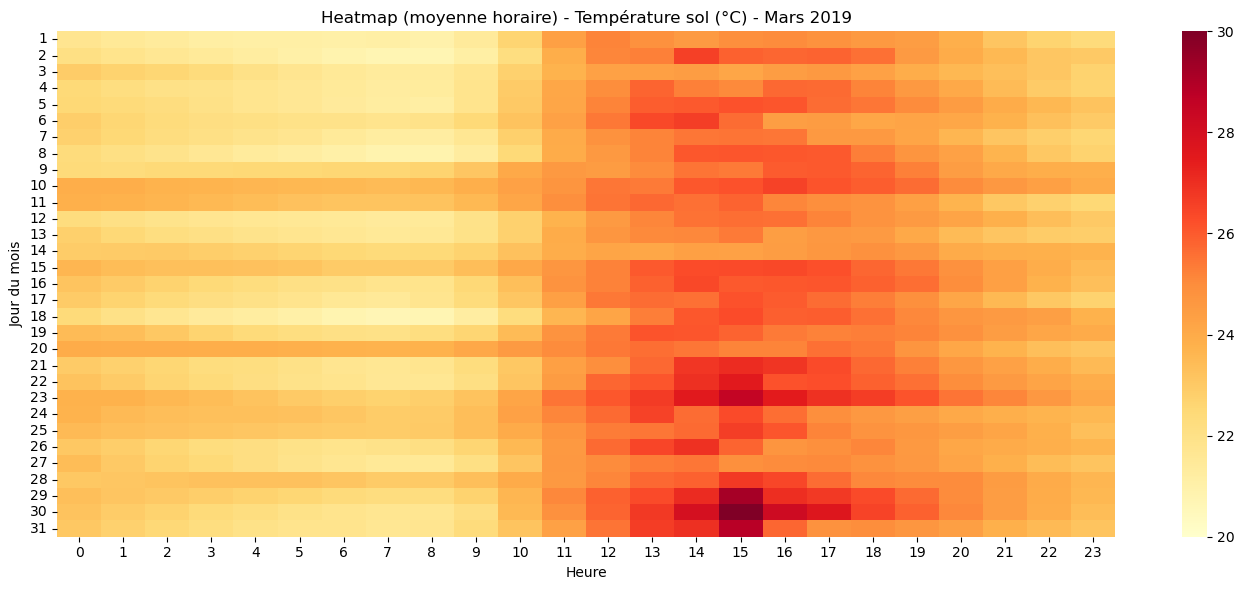

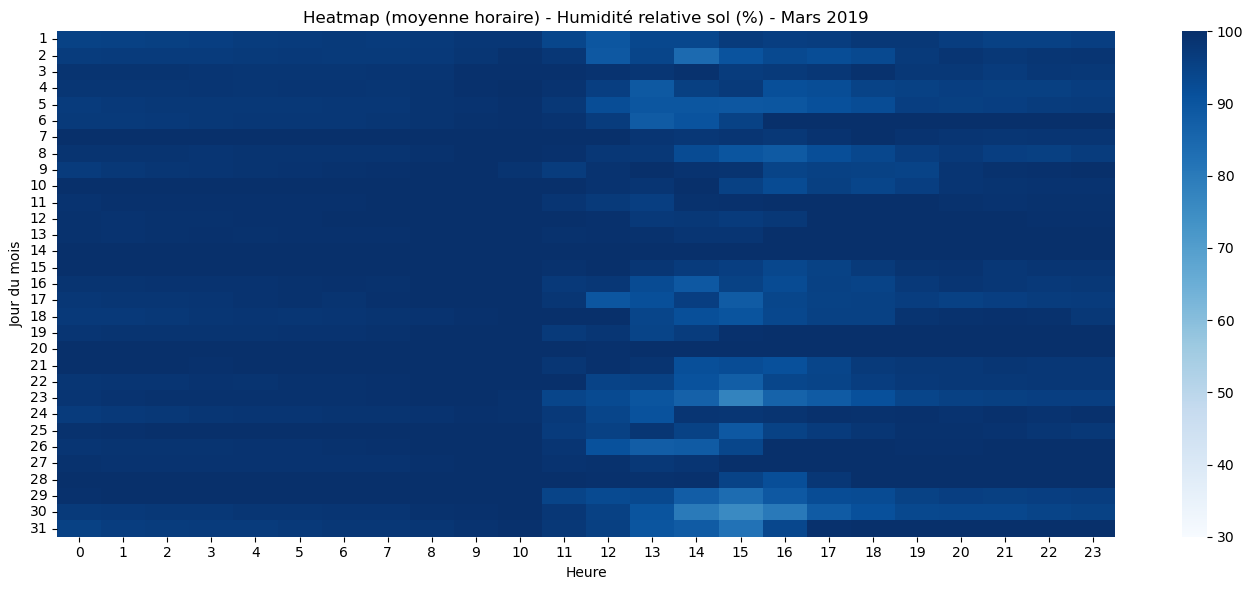

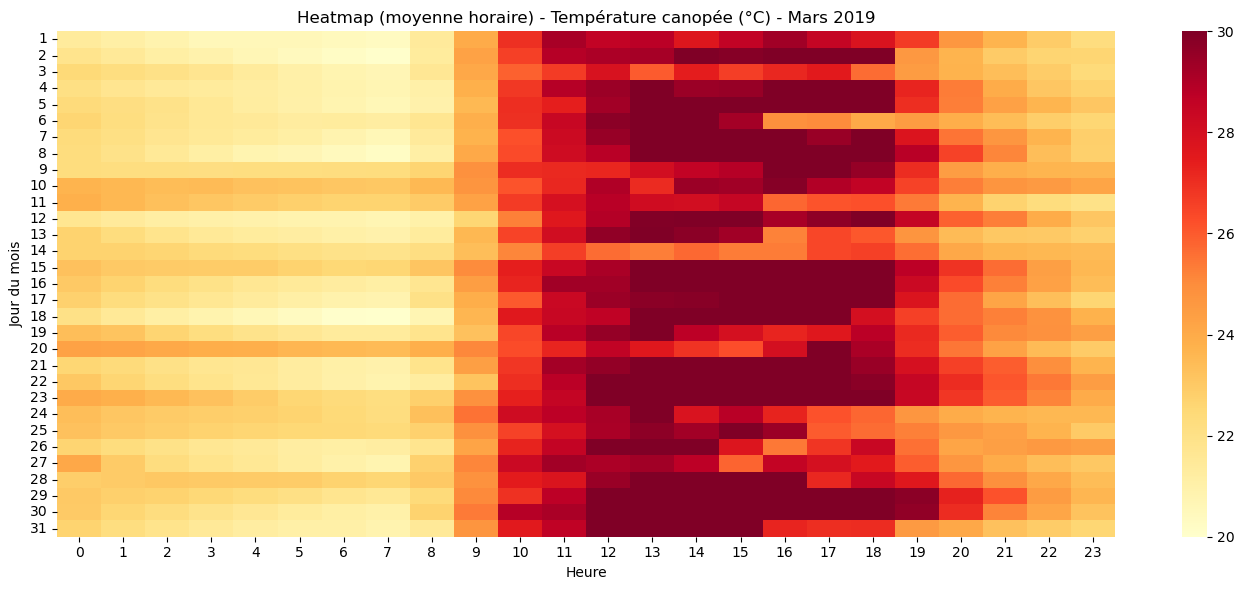

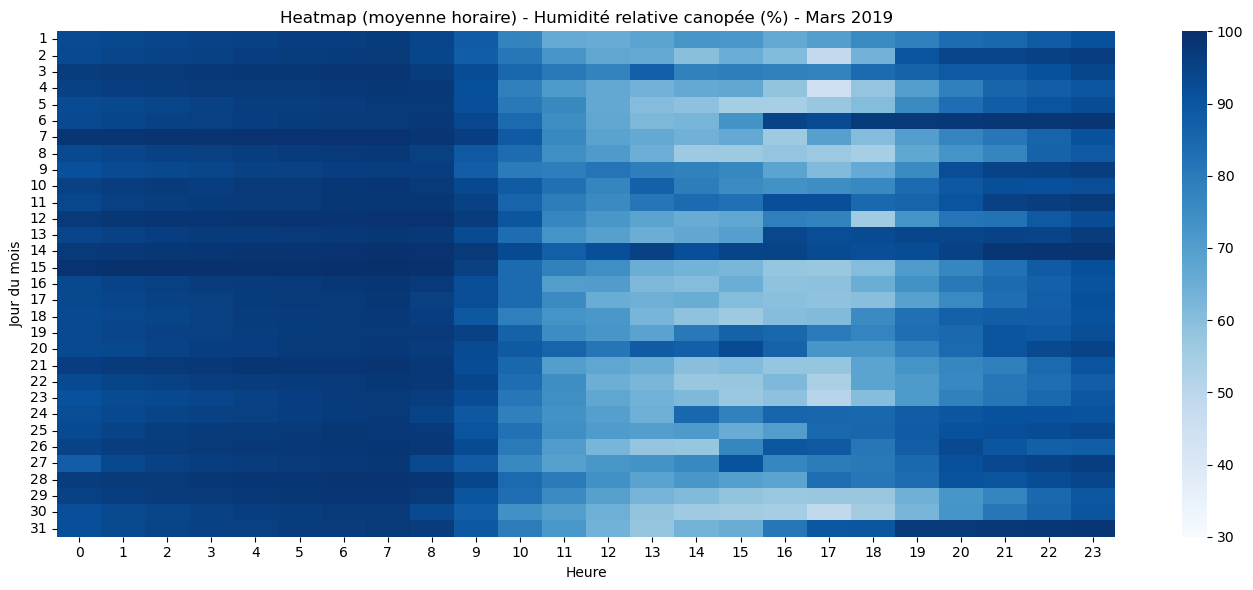

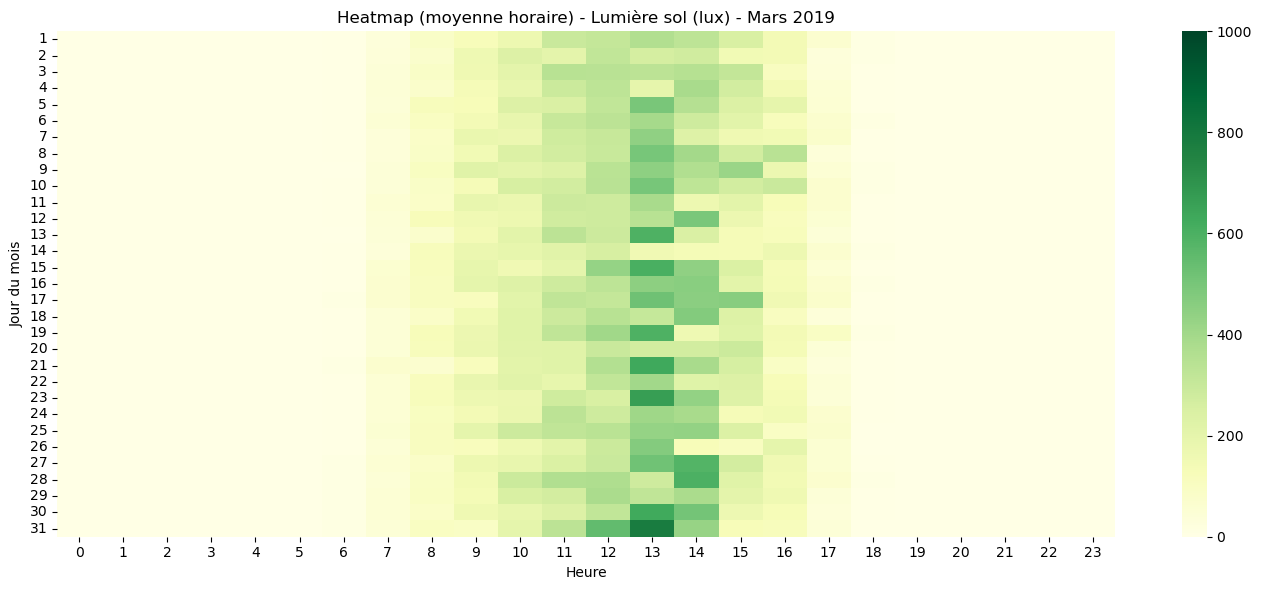

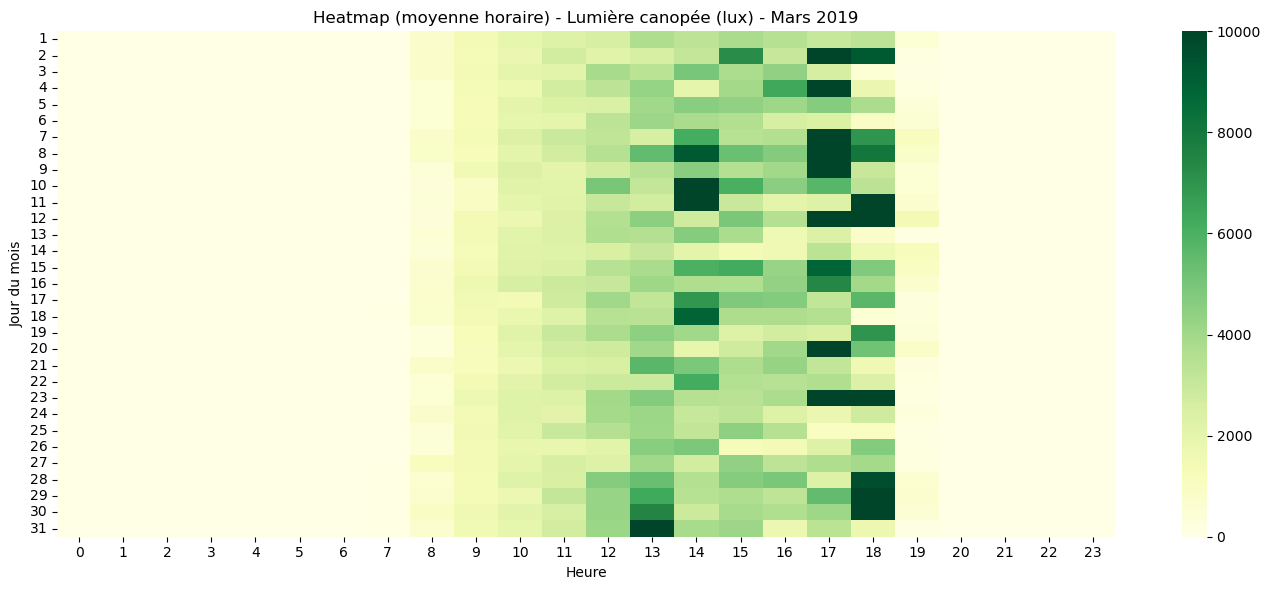

In [48]:
# Fonction pour créer la matrice [jour][heure] d'une variable météo avec moyenne par heure
def preparer_heatmap_data(annee, mois, variable, fichiers_par_date):
    data = np.full((31, 24), np.nan)

    if annee in fichiers_par_date and mois in fichiers_par_date[annee]:
        for jour in fichiers_par_date[annee][mois]:
            # Liste des valeurs par heure pour ce jour
            valeurs_par_heure = {h: [] for h in range(24)}

            fichiers = fichiers_par_date[annee][mois][jour]
            for f in fichiers:
                heure = f["datetime_arrondi"].hour
                valeur = f["meteo"].get(variable)
                try:
                    valeur = float(valeur)
                    valeurs_par_heure[heure].append(valeur)
                except (ValueError, TypeError):
                    continue

            # Moyenne des valeurs de chaque heure
            for h in range(24):
                if valeurs_par_heure[h]:
                    data[jour - 1, h] = np.mean(valeurs_par_heure[h])

    return data

# Configuration des variables météo
variable_configs = {
    "ground_temp":   {"cmap": "YlOrRd", "vmin": 20, "vmax": 30, "title": "Température sol (°C)"},
    "ground_rh":     {"cmap": "Blues",  "vmin": 30, "vmax": 100, "title": "Humidité relative sol (%)"},
    "canopy_temp":   {"cmap": "YlOrRd", "vmin": 20, "vmax": 30, "title": "Température canopée (°C)"},
    "canopy_rh":     {"cmap": "Blues",   "vmin": 30, "vmax": 100, "title": "Humidité relative canopée (%)"},
    "ground_lux":    {"cmap": "YlGn",   "vmin": 0,  "vmax": 1000, "title": "Lumière sol (lux)"},
    "canopy_lux":    {"cmap": "YlGn",   "vmin": 0,  "vmax": 10000, "title": "Lumière canopée (lux)"},
}

# Génération des heatmaps avec moyenne par heure
for variable, config in variable_configs.items():
    data_matrix = preparer_heatmap_data(2019, 3, variable, fichiers_par_date)

    plt.figure(figsize=(14, 6))
    sns.heatmap(
        data_matrix,
        cmap=config["cmap"],
        vmin=config["vmin"],
        vmax=config["vmax"],
        xticklabels=range(24),
        yticklabels=range(1, 32)
    )
    plt.title(f"Heatmap (moyenne horaire) - {config['title']} - Mars 2019")
    plt.xlabel("Heure")
    plt.ylabel("Jour du mois")
    plt.tight_layout()
    plt.show()


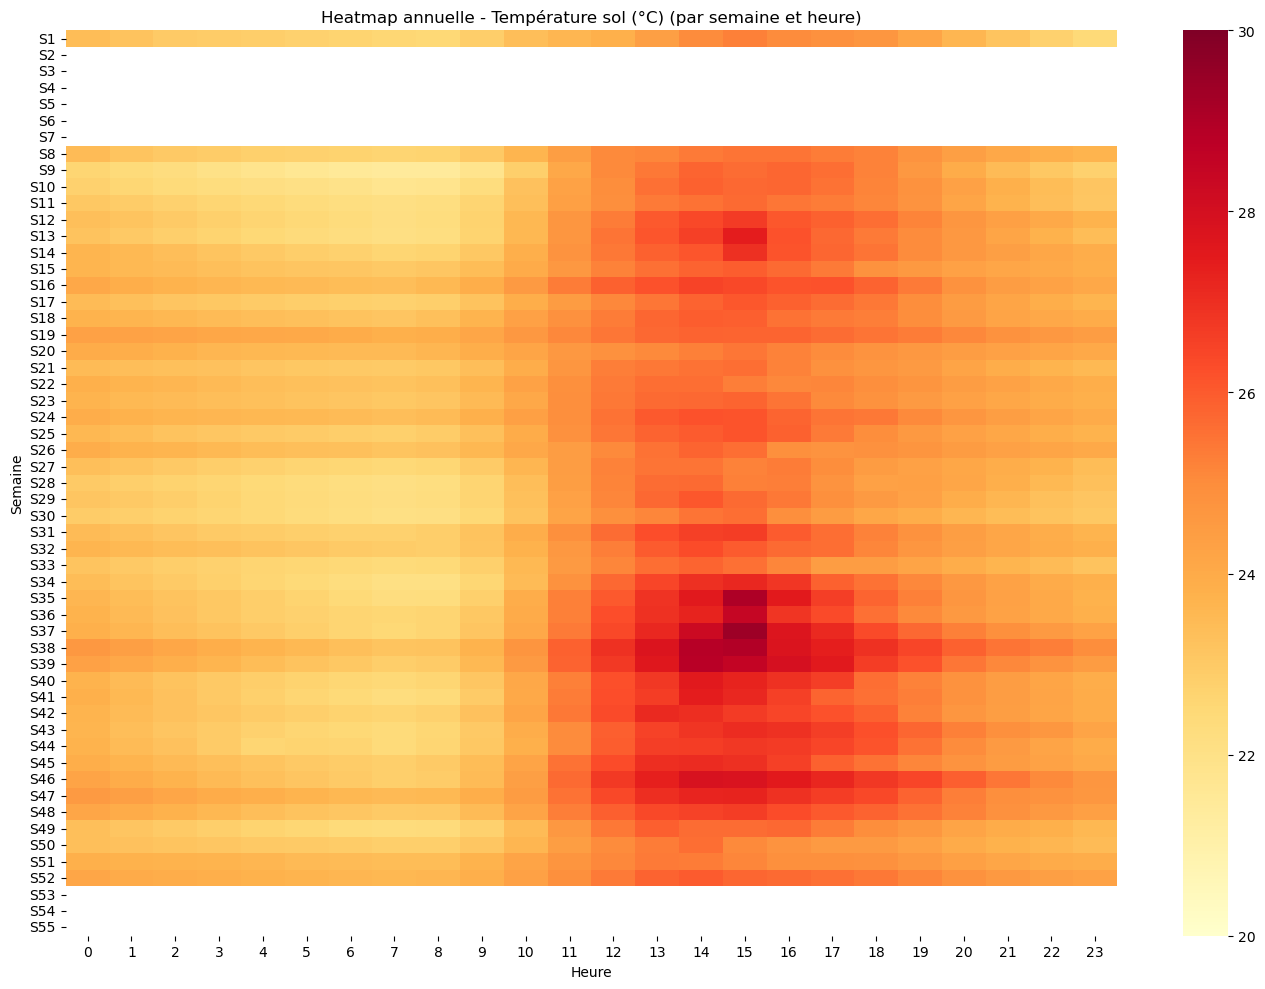

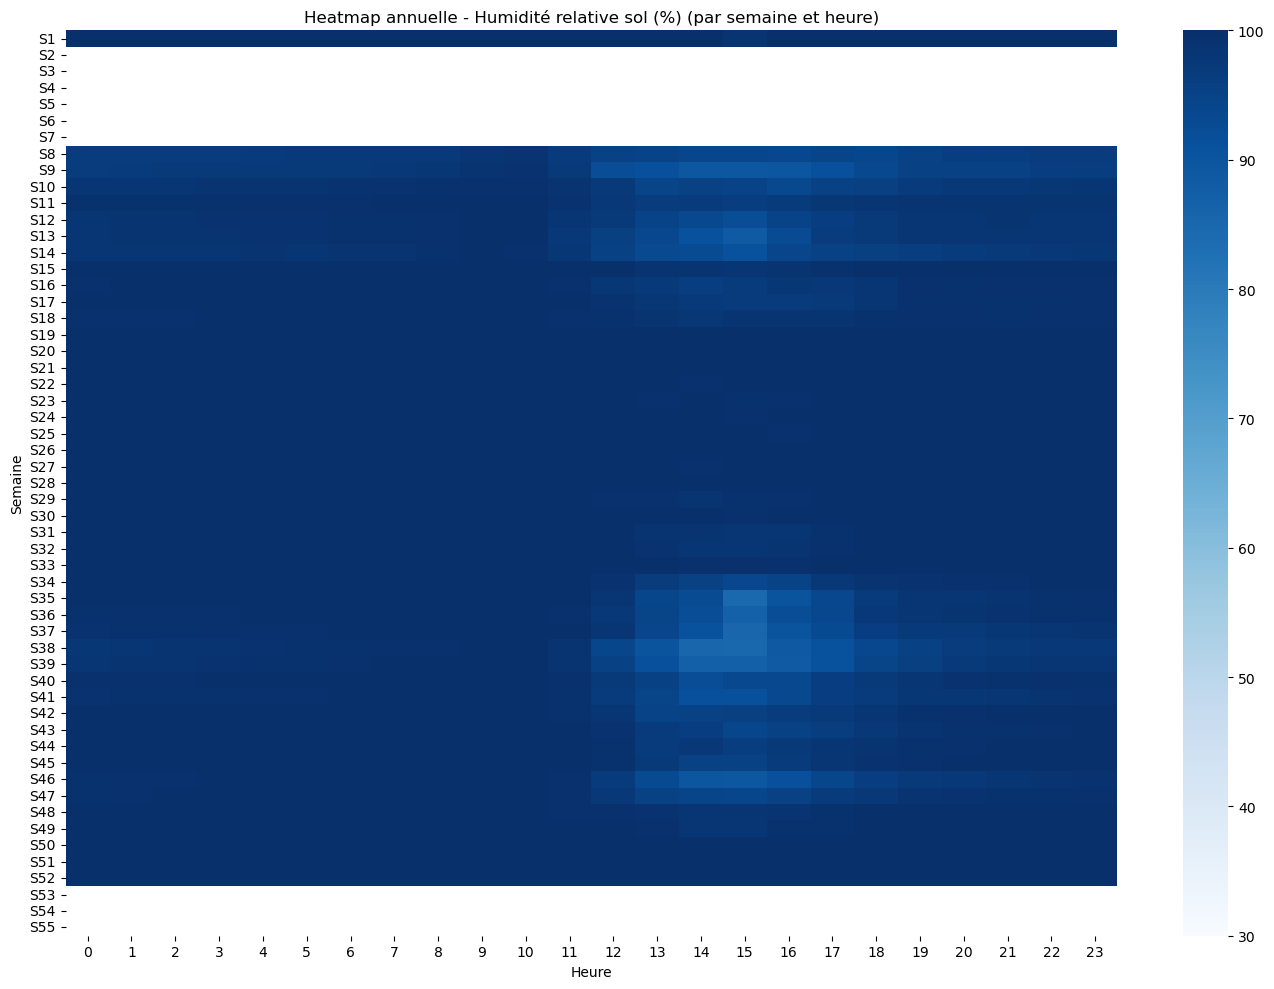

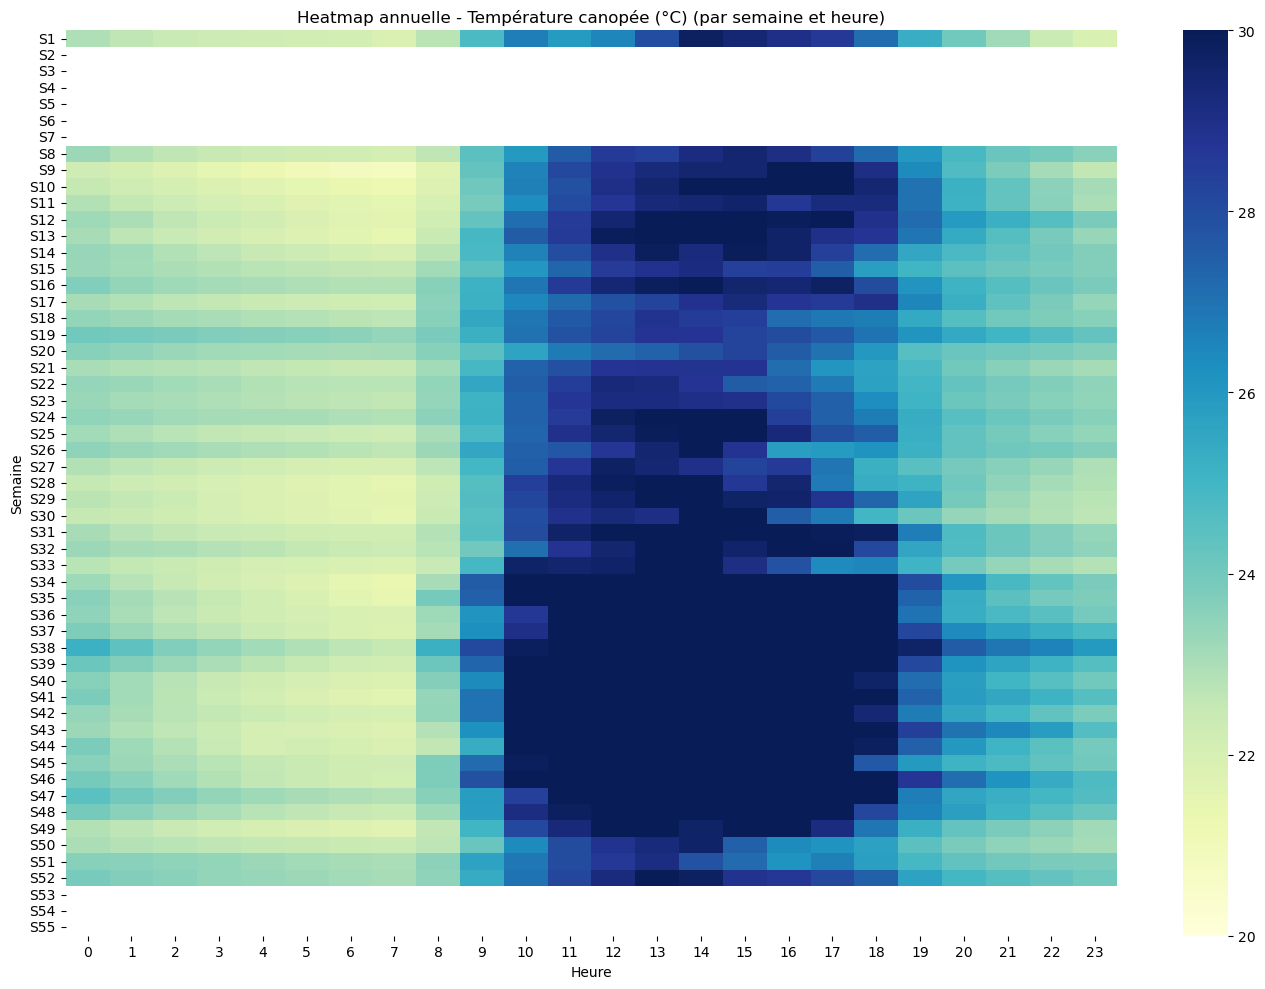

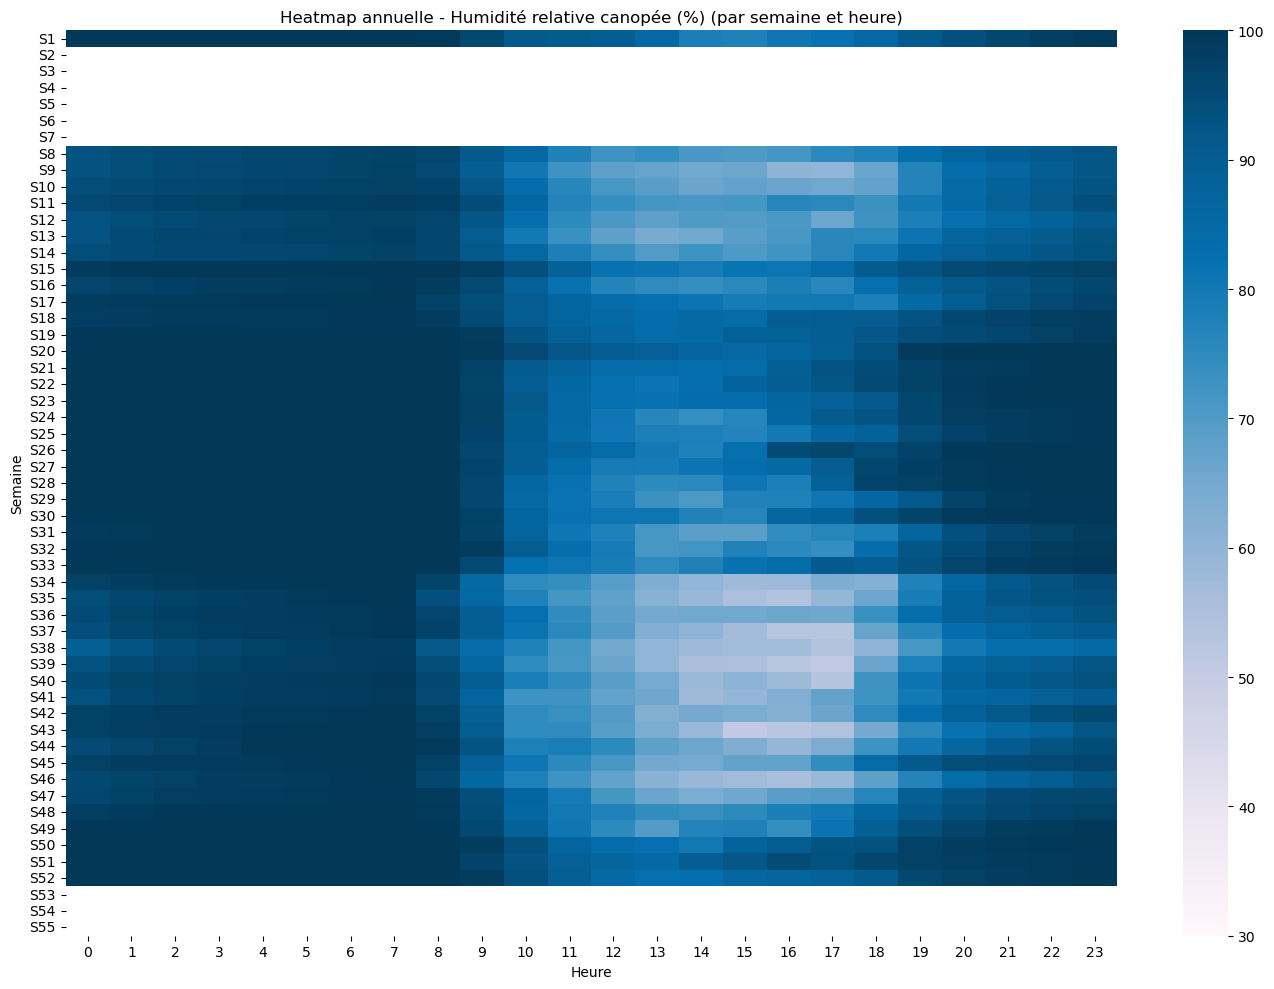

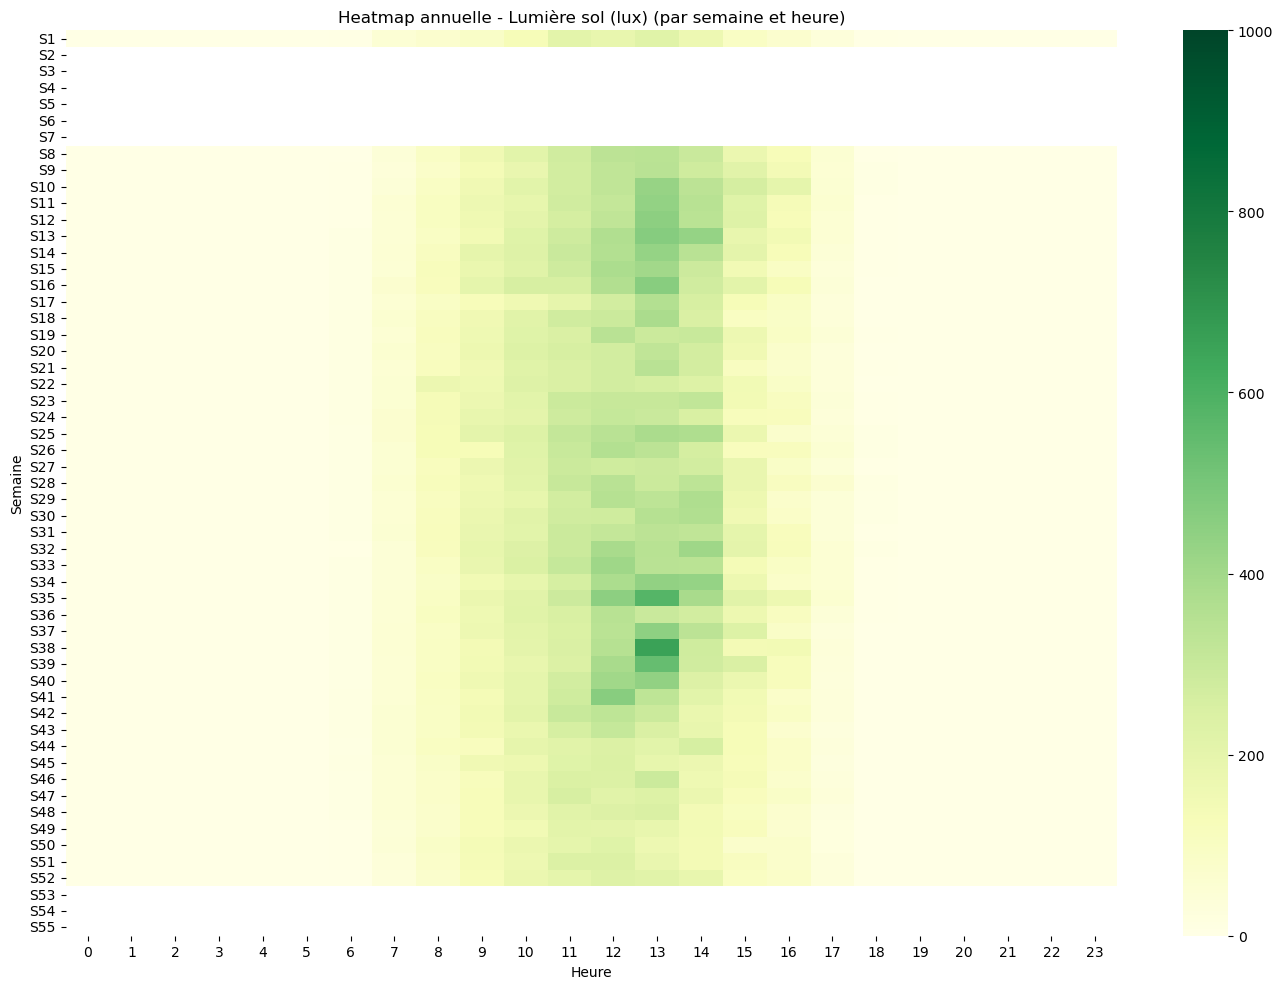

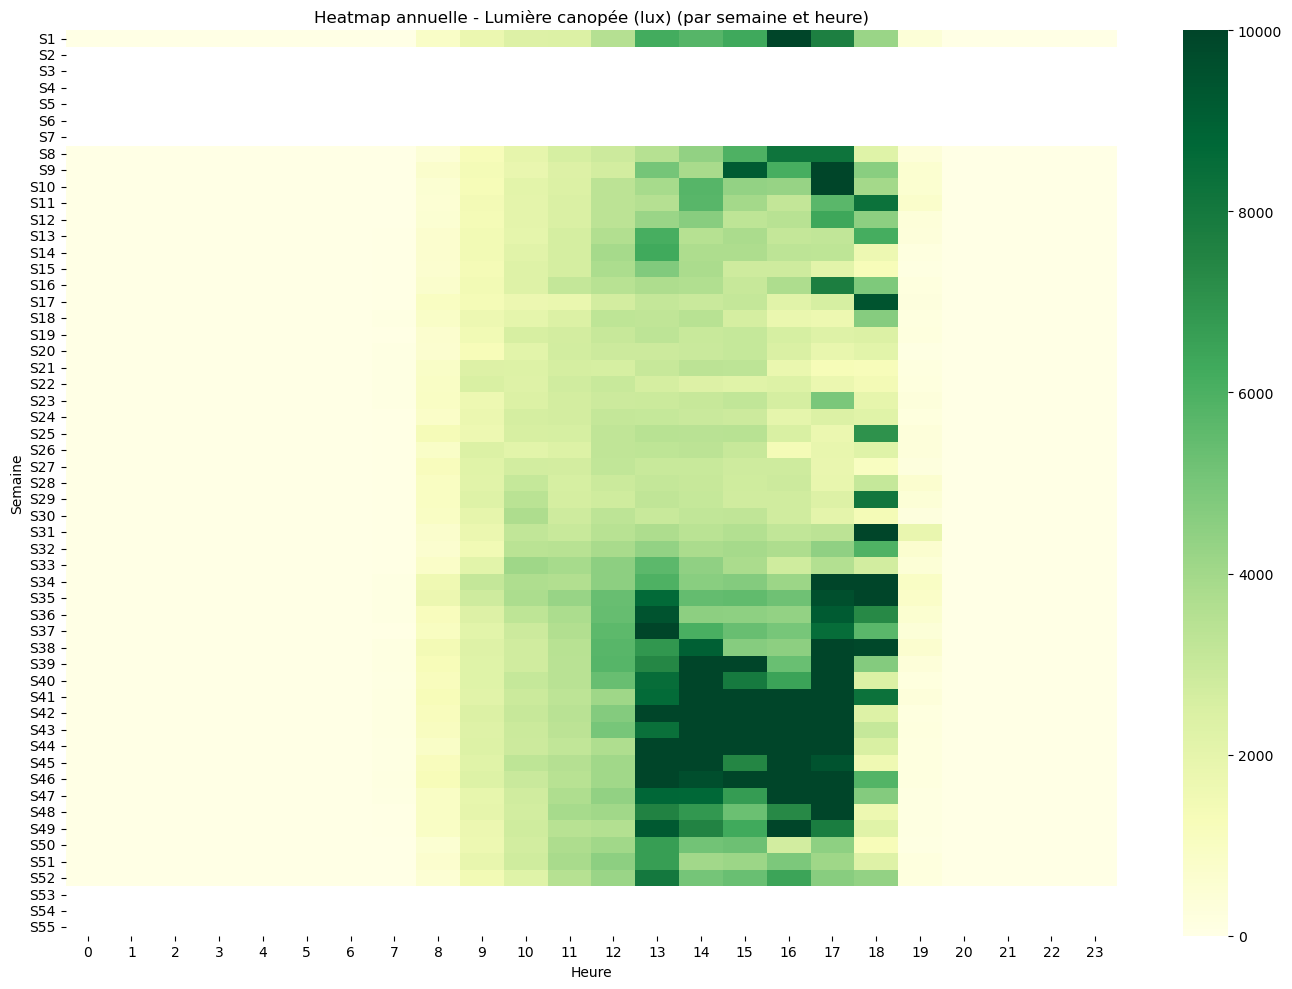

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict

# Configuration des variables météo
variable_configs = {
    "ground_temp":   {"cmap": "YlOrRd", "vmin": 20, "vmax": 30, "title": "Température sol (°C)"},
    "ground_rh":     {"cmap": "Blues",  "vmin": 30, "vmax": 100, "title": "Humidité relative sol (%)"},
    "canopy_temp":   {"cmap": "YlGnBu", "vmin": 20, "vmax": 30, "title": "Température canopée (°C)"},
    "canopy_rh":     {"cmap": "PuBu",   "vmin": 30, "vmax": 100, "title": "Humidité relative canopée (%)"},
    "ground_lux":    {"cmap": "YlGn",   "vmin": 0,  "vmax": 1000, "title": "Lumière sol (lux)"},
    "canopy_lux":    {"cmap": "YlGn",   "vmin": 0,  "vmax": 10000, "title": "Lumière canopée (lux)"},
}

# Regrouper les données météo par semaine et par heure
donnees_par_semaine = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

for annee in fichiers_par_date:
    for mois in fichiers_par_date[annee]:
        for jour in fichiers_par_date[annee][mois]:
            fichiers = fichiers_par_date[annee][mois][jour]
            for f in fichiers:
                dt = f["datetime_arrondi"]
                semaine = dt.isocalendar().week  # Numéro de la semaine ISO (1–53)
                heure = dt.hour
                for var, val in f["meteo"].items():
                    try:
                        val = float(val)
                        donnees_par_semaine[semaine][heure][var].append(val)
                    except:
                        continue

# Créer une matrice [semaine][heure] pour chaque variable (max 55 semaines)
num_semaines = 55
heatmap_data = {}

for variable, config in variable_configs.items():
    mat = np.full((num_semaines, 24), np.nan)
    for semaine in range(1, num_semaines + 1):
        for heure in range(24):
            valeurs = donnees_par_semaine[semaine][heure].get(variable, [])
            if valeurs:
                mat[semaine - 1, heure] = np.mean(valeurs)
    heatmap_data[variable] = mat

#  Afficher une heatmap par variable
for variable, mat in heatmap_data.items():
    config = variable_configs[variable]
    plt.figure(figsize=(14, 10))
    sns.heatmap(
        mat,
        cmap=config["cmap"],
        vmin=config["vmin"],
        vmax=config["vmax"],
        xticklabels=range(24),
        yticklabels=[f"S{w}" for w in range(1, num_semaines + 1)]
    )
    plt.title(f"Heatmap annuelle - {config['title']} (par semaine et heure)")
    plt.xlabel("Heure")
    plt.ylabel("Semaine")
    plt.tight_layout()
    plt.show()
